In [1]:
pip install pandas

In [2]:
pip install plotly

In [3]:
pip install matplotlib

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Doublet_EAF_35FD.csv",sep=",")

In [6]:
 Doublet_EAF_35FD= df
Doublet_EAF_35FD.head()

,Time,Longitude,Latitude,Depth,Magnitude
0,06/02/2023 23:56:02,37.510,37.976,11.70,3.9
1,06/02/2023 23:54:15,36.667,38.069,6.98,3.8
2,06/02/2023 23:49:55,36.081,36.248,7.62,3.7
3,06/02/2023 23:45:43,37.175,38.054,6.99,3.7
4,06/02/2023 23:36:24,37.151,38.221,7.00,3.8


In [7]:
Doublet_EAF_35FD.shape

(425, 5)

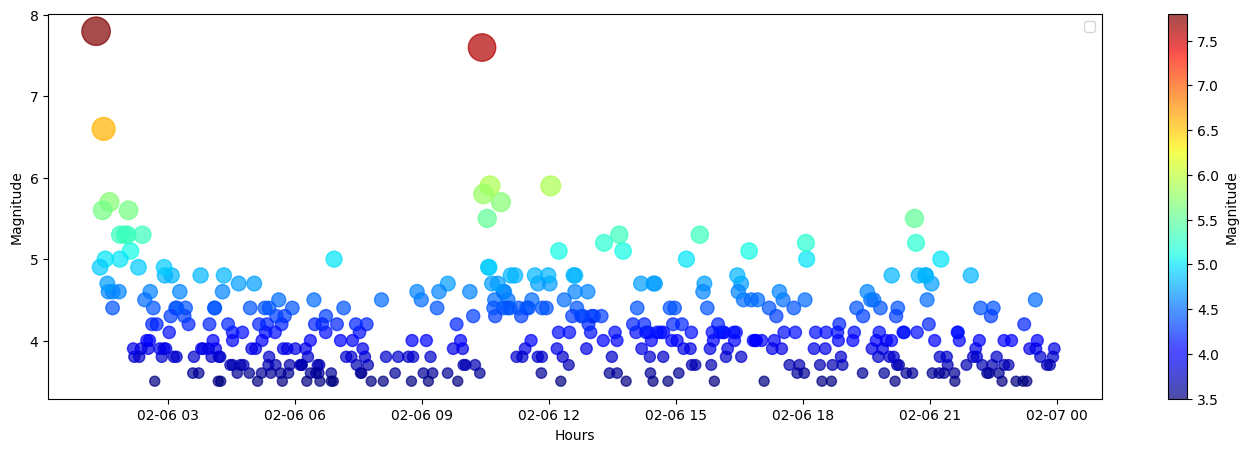

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame with example data
data = pd.DataFrame({
    'Date': Doublet_EAF_35FD.iloc[:, 0].values,
    'Magnitude': Doublet_EAF_35FD.iloc[:, 4].values
})

# Converting the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y %H:%M:%S')

# Plotting
plt.figure(figsize=(17, 5))
scatter = plt.scatter(
    data['Date'], data['Magnitude'],
    c=data['Magnitude'], cmap='jet',
    s=data['Magnitude']**2.6 * 2,  # Scaling the size based on magnitude
    alpha=0.7)

plt.colorbar(scatter, label='Magnitude')  # Adding color bar
plt.xlabel('Hours')
plt.ylabel('Magnitude')
plt.legend()
plt.rc('font', size=15)
plt.show()


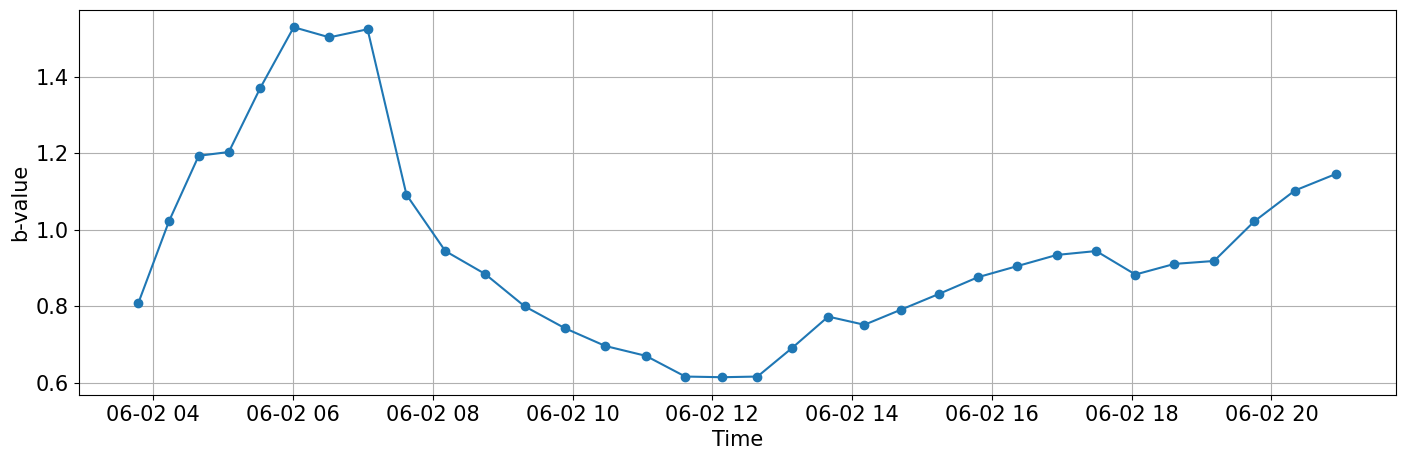

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute b-value
def compute_b_value(magnitudes, mc, bin_width=0.1):
    """
    Compute the b-value using the Maximum Likelihood Estimation (MLE) method.
    """
    if len(magnitudes) > 0:
        mean_mag = np.mean(magnitudes)
        b_value = (1 / np.log(10)) / (mean_mag - mc + (bin_width / 2))
    else:
        b_value = np.nan
    return b_value

# Function to calculate b-value distribution over time
def b_value_time_distribution(times, magnitudes, window_size=100, step_size=10):
    """
    Calculate b-value over time using a sliding window.

    Parameters:
        times (list or array): Timestamps of earthquakes.
        magnitudes (list or array): Magnitudes of earthquakes.
        window_size (int): Number of earthquakes in each window.
        step_size (int): Step size for sliding the window.

    Returns:
        time_centers (list): Center time for each window.
        b_values (list): b-values calculated for each window.
    """
    time_centers = []
    b_values = []

    for start in range(0, len(magnitudes) - window_size, step_size):
        end = start + window_size
        window_magnitudes = magnitudes[start:end]
        window_times = times[start:end]

        # Calculate Mc as the minimum magnitude in the window
        mc = np.min(window_magnitudes) + 0.2

        # Compute b-value
        b_value = compute_b_value(window_magnitudes, mc)
        time_centers.append(np.mean(window_times))
        b_values.append(b_value)

    return time_centers, b_values

# Assuming your DataFrame is already defined as Doublet_EAF_5Year
data = pd.DataFrame({
    'Time': Doublet_EAF_35FD.iloc[:, 0].values,
    'Magnitude': Doublet_EAF_35FD.iloc[:, 4].values
})

# Convert time to numeric (timestamp)
data["Time"] = pd.to_datetime(data["Time"])
data["time_numeric"] = data["Time"].apply(lambda x: x.timestamp())

# Calculate b-values over time
time_centers, b_values = b_value_time_distribution(
    data["time_numeric"].values,
    data["Magnitude"].values
)

# Plot the results
plt.figure(figsize=(17, 5))
plt.plot(pd.to_datetime(time_centers, unit='s'), b_values, marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("b-value")

plt.grid()
plt.show()


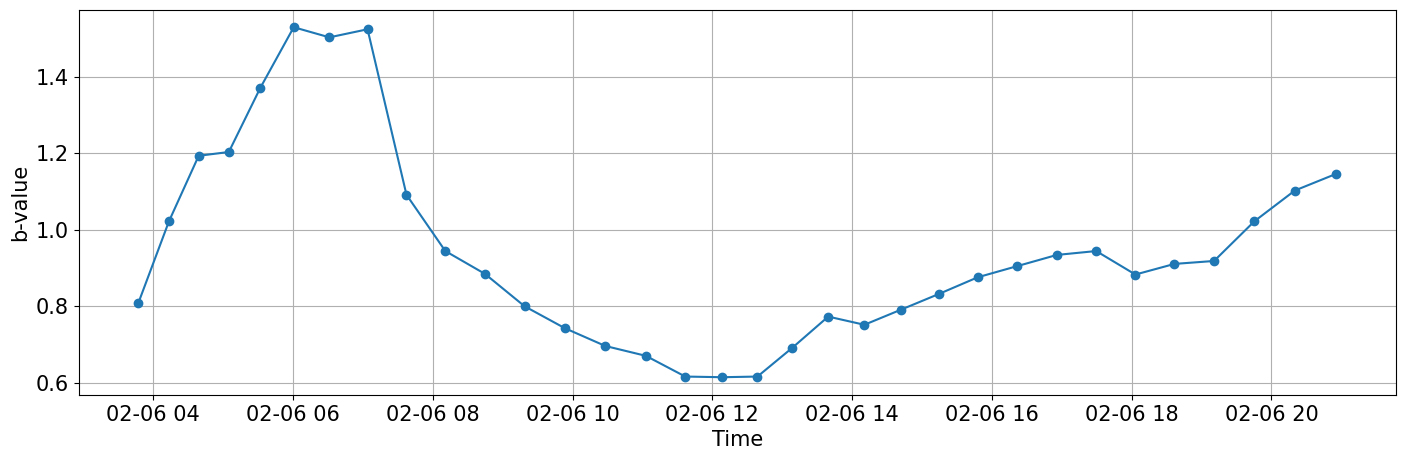

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame from Doublet_EAF_35FD
data = pd.DataFrame({
    'Time': Doublet_EAF_35FD.iloc[:, 0].values,
    'Magnitude': Doublet_EAF_35FD.iloc[:, 4].values
})

# Convert Time column to datetime with day-first format
data["Time"] = pd.to_datetime(data["Time"], dayfirst=True)

# Convert time to numeric (Unix timestamp)
data["time_numeric"] = data["Time"].apply(lambda x: x.timestamp())

# Ensure `b_value_time_distribution` is defined
# Assuming it returns time_centers and b_values
time_centers, b_values = b_value_time_distribution(
    data["time_numeric"].values,
    data["Magnitude"].values
)

# Plot b-values over time
plt.figure(figsize=(17, 5))
plt.plot(pd.to_datetime(time_centers, unit='s'), b_values, marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("b-value")

plt.grid()
plt.show()


In [11]:
import math
import numpy as np

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    # Deprem enerjisi erg cinsinden
    energy_erg = 10 ** (1.5 * magnitude + 4.8)
    # Joule cinsine çevirme
    energy_joule = energy_erg / 10**7
    return energy_joule

# Örnek büyüklükler
magnitudes = df[['Magnitude']].values  # Bu bir 2D NumPy array olabilir

print("Deprem büyüklüğü ve enerji (Joule):")
for mw in magnitudes:
    magnitude = mw[0]  # 2D array olduğu için ilk elemanı al
    energy = calculate_earthquake_energy(magnitude)
    print(f"Mw: {magnitude} --> Enerji: {energy:.2e} Joule")

Deprem büyüklüğü ve enerji (Joule):
Mw: 3.9 --> Enerji: 4.47e+03 Joule
Mw: 3.8 --> Enerji: 3.16e+03 Joule
Mw: 3.7 --> Enerji: 2.24e+03 Joule
Mw: 3.7 --> Enerji: 2.24e+03 Joule
Mw: 3.8 --> Enerji: 3.16e+03 Joule
Mw: 4.0 --> Enerji: 6.31e+03 Joule
Mw: 3.9 --> Enerji: 4.47e+03 Joule
Mw: 4.5 --> Enerji: 3.55e+04 Joule
Mw: 3.9 --> Enerji: 4.47e+03 Joule
Mw: 3.5 --> Enerji: 1.12e+03 Joule
Mw: 4.2 --> Enerji: 1.26e+04 Joule
Mw: 3.5 --> Enerji: 1.12e+03 Joule
Mw: 3.5 --> Enerji: 1.12e+03 Joule
Mw: 4.0 --> Enerji: 6.31e+03 Joule
Mw: 3.7 --> Enerji: 2.24e+03 Joule
Mw: 3.7 --> Enerji: 2.24e+03 Joule
Mw: 4.0 --> Enerji: 6.31e+03 Joule
Mw: 3.5 --> Enerji: 1.12e+03 Joule
Mw: 3.6 --> Enerji: 1.58e+03 Joule
Mw: 3.8 --> Enerji: 3.16e+03 Joule
Mw: 4.4 --> Enerji: 2.51e+04 Joule
Mw: 3.7 --> Enerji: 2.24e+03 Joule
Mw: 4.3 --> Enerji: 1.78e+04 Joule
Mw: 3.6 --> Enerji: 1.58e+03 Joule
Mw: 3.6 --> Enerji: 1.58e+03 Joule
Mw: 3.7 --> Enerji: 2.24e+03 Joule
Mw: 4.4 --> Enerji: 2.51e+04 Joule
Mw: 4.0 --> Enerji:

In [12]:
import math

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    energy_erg = 10 ** (1.5 * magnitude + 4.8)
    energy_joule = energy_erg / 10**7
    return energy_joule

# Örnek büyüklükler
magnitudes = df[['Magnitude']].values  # NumPy array

# Enerji değerlerini hesapla ve listeye ekle
energies = [calculate_earthquake_energy(mw[0]) for mw in magnitudes]

# Sonuç
print(energies)


[4466.835921509617, 3162.277660168379, 2238.7211385683468, 2238.7211385683468, 3162.277660168379, 6309.573444801942, 4466.835921509617, 35481.3389233576, 4466.835921509617, 1122.0184543019652, 12589.254117941713, 1122.0184543019652, 1122.0184543019652, 6309.573444801942, 2238.7211385683468, 2238.7211385683468, 6309.573444801942, 1122.0184543019652, 1584.8931924611109, 3162.277660168379, 25118.864315095823, 2238.7211385683468, 17782.794100389227, 1584.8931924611109, 1584.8931924611109, 2238.7211385683468, 25118.864315095823, 6309.573444801942, 3162.277660168379, 4466.835921509617, 3162.277660168379, 100000.0, 2238.7211385683468, 6309.573444801942, 8912.50938133744, 8912.50938133744, 1122.0184543019652, 1584.8931924611109, 2238.7211385683468, 3162.277660168379, 1584.8931924611109, 199526.23149688827, 3162.277660168379, 1584.8931924611109, 6309.573444801942, 1584.8931924611109, 70794.57843841403, 12589.254117941713, 35481.3389233576, 100000.0, 100000.0, 100000.0, 8912.50938133744, 398107.

In [13]:
energies

[4466.835921509617,
 3162.277660168379,
 2238.7211385683468,
 2238.7211385683468,
 3162.277660168379,
 6309.573444801942,
 4466.835921509617,
 35481.3389233576,
 4466.835921509617,
 1122.0184543019652,
 12589.254117941713,
 1122.0184543019652,
 1122.0184543019652,
 6309.573444801942,
 2238.7211385683468,
 2238.7211385683468,
 6309.573444801942,
 1122.0184543019652,
 1584.8931924611109,
 3162.277660168379,
 25118.864315095823,
 2238.7211385683468,
 17782.794100389227,
 1584.8931924611109,
 1584.8931924611109,
 2238.7211385683468,
 25118.864315095823,
 6309.573444801942,
 3162.277660168379,
 4466.835921509617,
 3162.277660168379,
 100000.0,
 2238.7211385683468,
 6309.573444801942,
 8912.50938133744,
 8912.50938133744,
 1122.0184543019652,
 1584.8931924611109,
 2238.7211385683468,
 3162.277660168379,
 1584.8931924611109,
 199526.23149688827,
 3162.277660168379,
 1584.8931924611109,
 6309.573444801942,
 1584.8931924611109,
 70794.57843841403,
 12589.254117941713,
 35481.3389233576,
 100000

In [14]:
df['Energy (Joule)'] = energies

In [15]:
Doublet_EAF_35FD= df
Doublet_EAF_35FD.head()

,Time,Longitude,Latitude,Depth,Magnitude,Energy (Joule)
0,06/02/2023 23:56:02,37.510,37.976,11.70,3.9,4466.835922
1,06/02/2023 23:54:15,36.667,38.069,6.98,3.8,3162.277660
2,06/02/2023 23:49:55,36.081,36.248,7.62,3.7,2238.721139
3,06/02/2023 23:45:43,37.175,38.054,6.99,3.7,2238.721139
4,06/02/2023 23:36:24,37.151,38.221,7.00,3.8,3162.277660


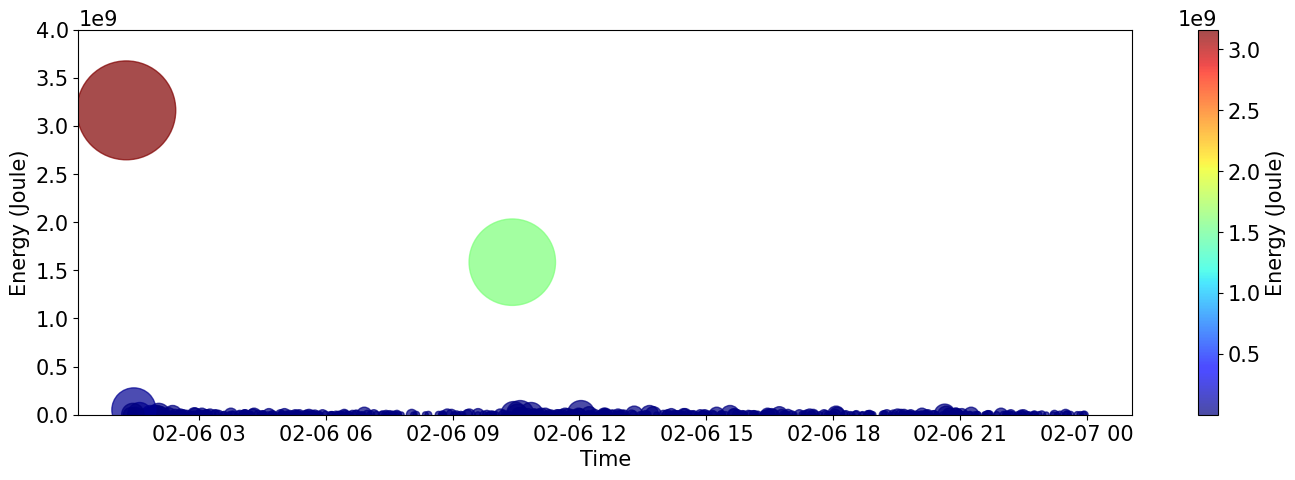

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Doublet_EAF_5Year is defined before this step
data = pd.DataFrame({
    'Time': Doublet_EAF_35FD.iloc[:, 0].values,
    'Energy (Joule)': Doublet_EAF_35FD.iloc[:, 5].values
})

# Converting the Time column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%d/%m/%Y %H:%M:%S')

# Plotting
plt.rc('font', size=15)  # Setting the font size globally
plt.figure(figsize=(17, 5))

scatter = plt.scatter(
    data['Time'], data['Energy (Joule)'],
    c=data['Energy (Joule)'], cmap='jet',
    s=data['Energy (Joule)']** 0.39,  # Adjust the size scaling as needed
    alpha=0.7
)

plt.colorbar(scatter, label='Energy (Joule)')  # Adding color bar
plt.xlabel('Time')
plt.ylabel('Energy (Joule)')
plt.ylim(0, 4e9)
plt.show()


In [24]:
x = Doublet_EAF_35FD.iloc[:,1].values
y = Doublet_EAF_35FD.iloc[:,2].values
z = Doublet_EAF_35FD.iloc[:,3].values
colors = Doublet_EAF_35FD.iloc[:,4].values
sizes = Doublet_EAF_35FD.iloc[:,4].values*25

In [25]:
import plotly.graph_objects as go

# Obtain high-resolution world map data online
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=["USA", "CAN", "MEX", "RUS", "CHN"],  # Example country codes (USA, Canada, Mexico, Russia, China)
    z=[1, 1, 1, 1, 1],  # Values to be assigned to countries (all set to 1)
    colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    zmin=3,
    zmax=8,
    marker_opacity=0.9,  # Opacity of country borders
    marker_line_width=1,  # Thickness of country borders
))

# Create sample earthquake data
earthquake_data = {
    'Longitude': x,
    'Latitude': y,
    'Magnitude': colors,
}

# Add earthquake data with Scatter plot
fig.add_trace(go.Scattermapbox(
    lat=earthquake_data['Latitude'],
    lon=earthquake_data['Longitude'],
    mode='markers',
    marker=dict(
        size=earthquake_data['Magnitude'] * 2,  # Set point sizes based on Magnitude value
        color=earthquake_data['Magnitude'],  # Set color scale based on Magnitude value
        colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    ),
))

# Specify map layout and style
fig.update_layout(
    mapbox_style="open-street-map",  # Set map style (for other styles: "open-street-map", "stamen-terrain", etc.)
    mapbox_zoom=6,  # Set map zoom level
    mapbox_center={"lat": 37.0000, "lon": 37.0000},  # Set map center (center of the USA)
)

# Increase resolution and font size
fig.update_layout(
    width=700,  # Set width to increase resolution
    height=630,  # Set height to increase resolution
    font=dict(
        size=28  # Set font size for English comments
    )
)

# Display the plot
fig.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display



# İnteraktif işlev

def plot_3d_scatter(elev, azim, zoom, theta):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet'))
    cbar.set_label('Magnitude')

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth_km')
    ax.dist = zoom  # Zoom ayarı
    ax.azim = theta  # Maus ile çevirme
    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
theta_slider = widgets.IntSlider(min=0, max=360, value=30, description='Theta:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider, theta=theta_slider)

# Widget'ı görüntüleme
display(interactive_plot)

interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…

In [27]:
x = Doublet_EAF_35FD.iloc[:,1].values
y = Doublet_EAF_35FD.iloc[:,2].values
z = Doublet_EAF_35FD.iloc[:,0].values
colors = Doublet_EAF_35FD.iloc[:,4].values
sizes = Doublet_EAF_35FD.iloc[:,4].values*8

In [28]:
z

array(['06/02/2023 23:56:02', '06/02/2023 23:54:15',
       '06/02/2023 23:49:55', '06/02/2023 23:45:43',
       '06/02/2023 23:36:24', '06/02/2023 23:32:04',
       '06/02/2023 23:30:06', '06/02/2023 23:29:15',
       '06/02/2023 23:21:06', '06/02/2023 23:17:11',
       '06/02/2023 23:13:27', '06/02/2023 23:11:38',
       '06/02/2023 23:01:55', '06/02/2023 22:55:26',
       '06/02/2023 22:51:17', '06/02/2023 22:45:03',
       '06/02/2023 22:44:54', '06/02/2023 22:42:01',
       '06/02/2023 22:37:38', '06/02/2023 22:34:20',
       '06/02/2023 22:29:39', '06/02/2023 22:28:07',
       '06/02/2023 22:26:17', '06/02/2023 22:23:35',
       '06/02/2023 22:20:42', '06/02/2023 22:14:01',
       '06/02/2023 22:11:35', '06/02/2023 22:09:50',
       '06/02/2023 22:06:14', '06/02/2023 22:04:42',
       '06/02/2023 22:01:06', '06/02/2023 21:57:43',
       '06/02/2023 21:51:33', '06/02/2023 21:41:26',
       '06/02/2023 21:39:39', '06/02/2023 21:38:46',
       '06/02/2023 21:35:08', '06/02/2023 21:3

In [29]:
from datetime import datetime

# Zaman damgalarını içeren bir liste oluştur
timestamps = z

# Zaman damgalarını saniyeye dönüştür
seconds = [datetime.timestamp(datetime.strptime(timestamp, '%d/%m/%Y %H:%M:%S')) for timestamp in timestamps]

print(seconds) # Saniye cinsinden zaman damgalarını görüntüle

[1675727762.0, 1675727655.0, 1675727395.0, 1675727143.0, 1675726584.0, 1675726324.0, 1675726206.0, 1675726155.0, 1675725666.0, 1675725431.0, 1675725207.0, 1675725098.0, 1675724515.0, 1675724126.0, 1675723877.0, 1675723503.0, 1675723494.0, 1675723321.0, 1675723058.0, 1675722860.0, 1675722579.0, 1675722487.0, 1675722377.0, 1675722215.0, 1675722042.0, 1675721641.0, 1675721495.0, 1675721390.0, 1675721174.0, 1675721082.0, 1675720866.0, 1675720663.0, 1675720293.0, 1675719686.0, 1675719579.0, 1675719526.0, 1675719308.0, 1675719278.0, 1675718699.0, 1675718618.0, 1675718386.0, 1675718117.0, 1675718026.0, 1675717978.0, 1675717590.0, 1675717395.0, 1675717325.0, 1675717093.0, 1675716948.0, 1675716840.0, 1675716802.0, 1675716240.0, 1675716089.0, 1675716005.0, 1675715871.0, 1675715701.0, 1675715172.0, 1675714990.0, 1675714914.0, 1675714554.0, 1675714450.0, 1675714389.0, 1675714307.0, 1675714220.0, 1675714108.0, 1675713934.0, 1675713922.0, 1675713746.0, 1675713479.0, 1675713295.0, 1675713158.0, 16757

In [ ]:
seconds

[1675727762.0,
 1675727655.0,
 1675727395.0,
 1675727143.0,
 1675726584.0,
 1675726324.0,
 1675726206.0,
 1675726155.0,
 1675725666.0,
 1675725431.0,
 1675725207.0,
 1675725098.0,
 1675724515.0,
 1675724126.0,
 1675723877.0,
 1675723503.0,
 1675723494.0,
 1675723321.0,
 1675723058.0,
 1675722860.0,
 1675722579.0,
 1675722487.0,
 1675722377.0,
 1675722215.0,
 1675722042.0,
 1675721641.0,
 1675721495.0,
 1675721390.0,
 1675721174.0,
 1675721082.0,
 1675720866.0,
 1675720663.0,
 1675720293.0,
 1675719686.0,
 1675719579.0,
 1675719526.0,
 1675719308.0,
 1675719278.0,
 1675718699.0,
 1675718618.0,
 1675718386.0,
 1675718117.0,
 1675718026.0,
 1675717978.0,
 1675717590.0,
 1675717395.0,
 1675717325.0,
 1675717093.0,
 1675716948.0,
 1675716840.0,
 1675716802.0,
 1675716240.0,
 1675716089.0,
 1675716005.0,
 1675715871.0,
 1675715701.0,
 1675715172.0,
 1675714990.0,
 1675714914.0,
 1675714554.0,
 1675714450.0,
 1675714389.0,
 1675714307.0,
 1675714220.0,
 1675714108.0,
 1675713934.0,
 167571392

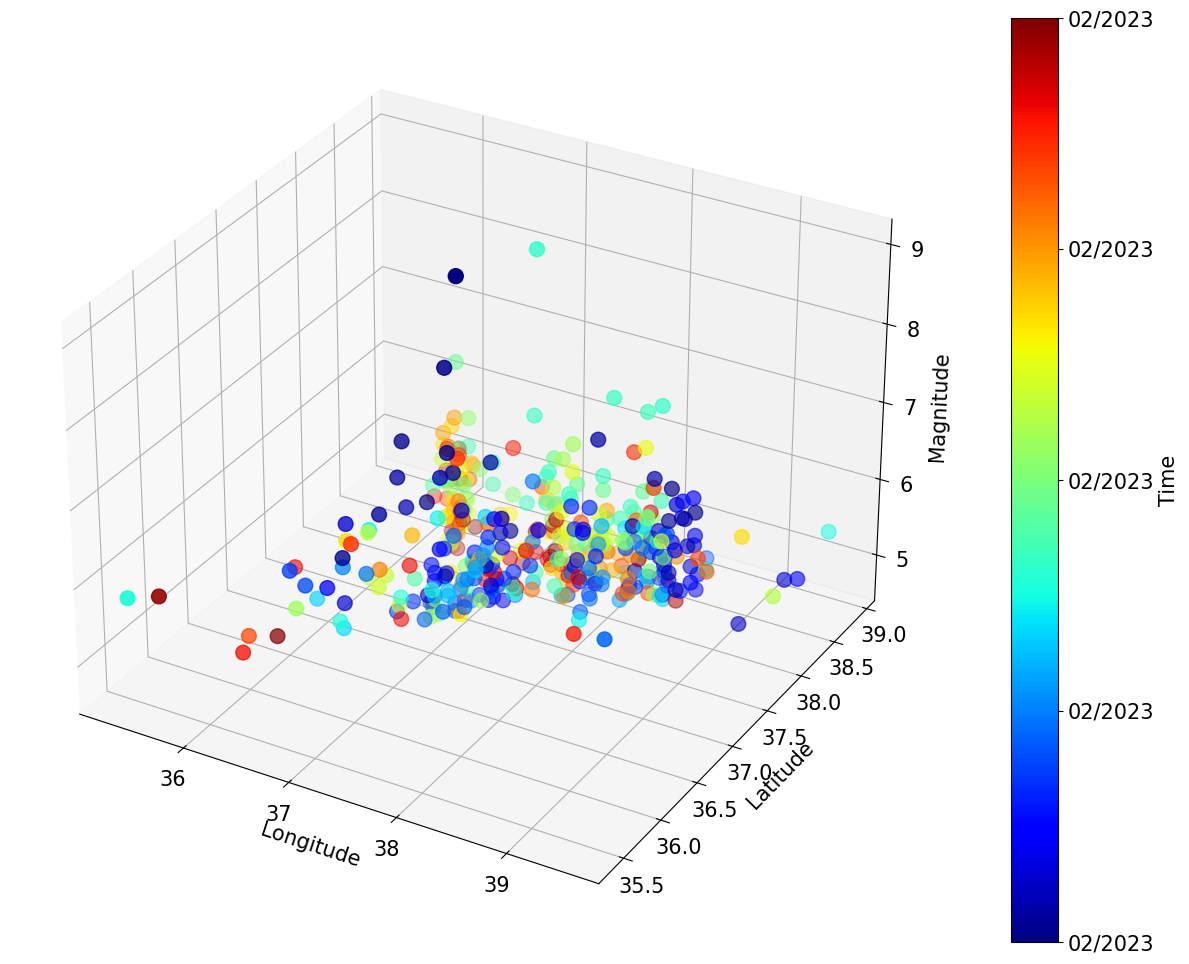

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime

# Ensure 'Doublet_EAF_5Year' is a valid DataFrame
# Convert the time data into seconds since epoch if needed
# Example: seconds = Doublet_EAF_5Year['time_column'].apply(lambda t: datetime.timestamp(t))

x = Doublet_EAF_35FD.iloc[:,1].values
y = Doublet_EAF_35FD.iloc[:,2].values
z = Doublet_EAF_35FD.iloc[:,4].values+1.2


# Define colors based on time, assuming 'seconds' is a time-based array in seconds
colors = seconds  # Ensure seconds is defined
sizes = Doublet_EAF_35FD.iloc[:,4].values+1.2*90

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')

# Colorbar for time representation
cbar = plt.colorbar(scatter)
cbar.set_label('Time')

# Labeling axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Magnitude')

# Formatting colorbar time ticks
time_ticks = np.linspace(min(seconds), max(seconds), 5)
time_labels = [datetime.fromtimestamp(t).strftime('%m/%Y') for t in time_ticks]
cbar.set_ticks(time_ticks)
cbar.set_ticklabels(time_labels)

# Adjust font size
plt.rc('font', size=12)

plt.show()


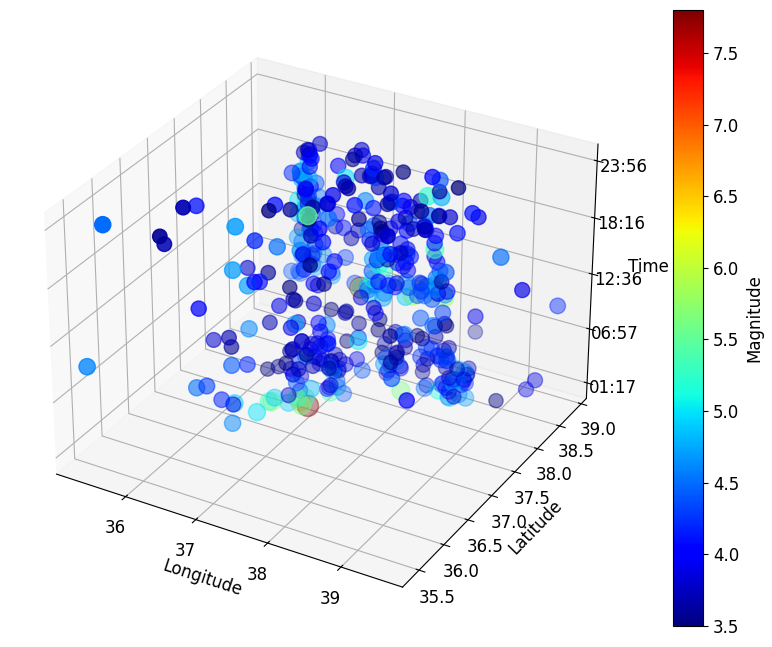

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime

# Assuming Doublet_EAF_35F3 is a DataFrame with appropriate columns
x = Doublet_EAF_35FD.iloc[:, 1].values
y = Doublet_EAF_35FD.iloc[:, 2].values
z = seconds
colors = Doublet_EAF_35FD.iloc[:, 4].values
sizes = Doublet_EAF_35FD.iloc[:, 4].values * 30

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Magnitude')

# Labeling axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Formatting time ticks
# Assuming seconds is a list or array of time values
# Adjust the ticks and labels according to your data
time_ticks = np.linspace(min(seconds), max(seconds), 5)
time_labels = [datetime.fromtimestamp(t).strftime('%H:%M') for t in time_ticks]  # Format güncellendi
ax.set_zticks(time_ticks)
ax.set_zticklabels(time_labels)

# Adjust font size
plt.rc('font', size=15)

plt.show()